In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
file_path = './train.csv'
data = pd.read_csv(file_path)

# Print information about the file
print("Number of rows:", len(data))
print("Column names:", data.columns.tolist())

# Print the first 5 rows of the data
print("\nFirst 5 rows of data:")
data.head()

Number of rows: 1647
Column names: ['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

First 5 rows of data:


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,Individual,1995 cc,184 bhp @ 4000 rpm,350 Nm @ 1750 rpm,RWD,4454.0,2044.0,1545.0,5.0,63.0
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,Individual,1997 cc,138 bhp @ 3750 rpm,320 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,Individual,2925 cc,326 bhp @ 3600 rpm,700 Nm @ 1200 rpm,AWD,5207.0,2157.0,1823.0,7.0,90.0
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,Individual,2755 cc,174 bhp @ 3400 rpm,450 Nm @ 1600 rpm,RWD,4795.0,1855.0,1835.0,7.0,80.0


In [5]:
def get_column_info(data):
    print("\nInformation about the columns:")
    column_info = pd.DataFrame({
        'Column Name': data.columns,
        'Description': [
            "Hãng xe", "Mẫu xe", "Giá xe (VNĐ)", "Năm sản xuất", "Số km đã đi", 
            "Loại nhiên liệu", "Hộp số", "Địa điểm bán", "Màu xe", "Số chủ sở hữu trước đó", 
            "Loại người bán", "Dung tích động cơ (cc)", "Công suất tối đa (bhp)", 
            "Mô-men xoắn tối đa (Nm)", "Hệ dẫn động", "Chiều dài xe (mm)", 
            "Chiều rộng xe (mm)", "Chiều cao xe (mm)", "Số chỗ ngồi", 
            "Dung tích bình nhiên liệu (lít)"
        ],
        'Data Type': data.dtypes.values,
        'Number of NaN': data.isna().sum().values,
        'Unique Values': data.nunique().values,
        'Most Frequent Value': data.mode().iloc[0].values,
    })

    return column_info

print("\nNumber of rows with NaN values:", data.isna().any(axis=1).sum())

# Print information about the columns
column_info = get_column_info(data)
column_info 


Number of rows with NaN values: 149

Information about the columns:


,Column Name,Description,Data Type,Number of NaN,Unique Values,Most Frequent Value
0,Make,Hãng xe,object,0,31,Maruti Suzuki
1,Model,Mẫu xe,object,0,912,X1 sDrive20d xLine
2,Price,Giá xe (VNĐ),int64,0,564,425000
3,Year,Năm sản xuất,int64,0,21,2017
4,Kilometer,Số km đã đi,int64,0,701,42000
5,Fuel Type,Loại nhiên liệu,object,0,8,Diesel
6,Transmission,Hộp số,object,0,2,Manual
7,Location,Địa điểm bán,object,0,76,Mumbai
8,Color,Màu xe,object,0,17,White
9,Owner,Số chủ sở hữu trước đó,object,0,6,First


In [7]:
# Handle missing values
# Fill numeric columns with their mean
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean().astype(int))

# Fill categorical columns with the most frequent value
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Remove duplicates
data = data.drop_duplicates()

# Reset index after cleaning
data.reset_index(drop=True, inplace=True)

# Print summary after cleaning
print("Data cleaned successfully!")
print("Number of rows after cleaning:", len(data))
print("Number of missing values after cleaning:", data.isna().sum().sum())

Data cleaned successfully!
Number of rows after cleaning: 1647
Number of missing values after cleaning: 0


In [9]:
 #Standardize the data

# 'Engine' ('cc') -> float
data['Engine'] = data['Engine'].astype(str).str.replace(' cc', '').astype(float)

# 'Max Power' ('bhp') -> int
data['Max Power'] = data['Max Power'].astype(str).str.extract(r'(\d+)', expand=False).astype(int)

# 'Max Torque' ('Nm') -> int
data['Max Torque'] = data['Max Torque'].astype(str).str.extract(r'(\d+)', expand=False).astype(int)

# 'Seating Capacity' -> int
data['Seating Capacity'] = data['Seating Capacity'].astype(int)

# 'Fuel Tank Capacity' -> int
data['Fuel Tank Capacity'] = data['Fuel Tank Capacity'].astype(int)

# 'Owner' -> int
data['Owner'] = data['Owner'].map({
    'UnRegistered Car': 0,
    'First': 1,
    'Second': 2,
    'Third': 3,
    'Fourth': 4,
    '4 or More': 5,
    0: 0,
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 5,
})

print(data[['Engine', 'Max Power', 'Max Torque', 'Seating Capacity', 'Fuel Tank Capacity']].head())

   Engine  Max Power  Max Torque  Seating Capacity  Fuel Tank Capacity
0  1197.0         89         200                 5                  52
1  1995.0        184         350                 5                  63
2  1997.0        138         320                 7                  70
3  2925.0        326         700                 7                  90
4  2755.0        174         450                 7                  80


In [11]:
get_column_info(data)


Information about the columns:


,Column Name,Description,Data Type,Number of NaN,Unique Values,Most Frequent Value
0,Make,Hãng xe,object,0,31,Maruti Suzuki
1,Model,Mẫu xe,object,0,912,X1 sDrive20d xLine
2,Price,Giá xe (VNĐ),int64,0,564,425000
3,Year,Năm sản xuất,int64,0,21,2017
4,Kilometer,Số km đã đi,int64,0,701,42000
5,Fuel Type,Loại nhiên liệu,object,0,8,Diesel
6,Transmission,Hộp số,object,0,2,Manual
7,Location,Địa điểm bán,object,0,76,Mumbai
8,Color,Màu xe,object,0,17,White
9,Owner,Số chủ sở hữu trước đó,int64,0,6,1


In [13]:
object_columns = data.select_dtypes(include=['object']).columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# List of object columns and their unique values
object_columns_list = [(col, data[col].nunique()) for col in object_columns]

# List of numeric columns and their unique values
numeric_columns_list = [(col, data[col].nunique()) for col in numeric_columns]

print("Object Columns and Unique Values:")
print(object_columns_list)

print("\nNumeric Columns and Unique Values:")
print(numeric_columns_list)

Object Columns and Unique Values:
[('Make', 31), ('Model', 912), ('Fuel Type', 8), ('Transmission', 2), ('Location', 76), ('Color', 17), ('Seller Type', 3), ('Drivetrain', 3)]

Numeric Columns and Unique Values:
[('Price', 564), ('Year', 21), ('Kilometer', 701), ('Owner', 6), ('Engine', 101), ('Length', 231), ('Width', 160), ('Height', 187)]


In [15]:
for col in data.select_dtypes(include=['object']).columns:
    print(f"\n🔹 Column: {col}")
    print(f"   Unique Values Count: {data[col].nunique()}")
    print(f"   Unique Values: {data[col].unique()[:10]}")  # Hiển thị 10 giá trị đầu tiên



🔹 Column: Make
   Unique Values Count: 31
   Unique Values: ['BMW' 'Mahindra' 'Mercedes-Benz' 'Toyota' 'Maruti Suzuki' 'Land Rover'
 'Ford' 'Honda' 'Hyundai' 'Volvo']

🔹 Column: Model
   Unique Values Count: 912
   Unique Values: ['3-Series 320d' 'X1 sDrive20d xLine' 'XUV500 W4 1.99' 'GLS 400d 4MATIC'
 'Fortuner 2.8 4x2 AT [2016-2020]'
 'Vitara Brezza ZDi+ Dual Tone [2017-2018]' 'DZire LDi'
 'E-Class E 220d Exclusive [2019-2019]' 'Range Rover 3.0 V6 Diesel Vogue'
 'Ecosport Titanium + 1.5L TDCi [2019-2020]']

🔹 Column: Fuel Type
   Unique Values Count: 8
   Unique Values: ['Diesel' 'Petrol' 'CNG' 'LPG' 'CNG + CNG' 'Electric' 'Hybrid'
 'Petrol + LPG']

🔹 Column: Transmission
   Unique Values Count: 2
   Unique Values: ['Automatic' 'Manual']

🔹 Column: Location
   Unique Values Count: 76
   Unique Values: ['Mumbai' 'Surat' 'Muzaffurpur' 'Delhi' 'Ambala Cantt' 'Noida' 'Bangalore'
 'Kanpur' 'Hyderabad' 'Patna']

🔹 Column: Color
   Unique Values Count: 17
   Unique Values: ['White' 'Black'

In [17]:
make_price_mapping = {
    'Maruti Suzuki': 0, 'Hyundai': 0, 'Tata': 0, 'Mahindra': 0, 'Datsun': 0, 'Renault': 0, 'Nissan': 0, 'Ford': 0, 'Chevrolet': 0, 'Fiat': 0,
    'Honda': 1, 'Toyota': 1, 'Skoda': 1, 'Volkswagen': 1, 'MG': 1, 'Kia': 1,
    'BMW': 2, 'Mercedes-Benz': 2, 'Audi': 2, 'Volvo': 2, 'Jeep': 2, 'Land Rover': 2, 'MINI': 2, 'Isuzu': 2,
    'Porsche': 3, 'Jaguar': 3, 'Lexus': 3, 'Rolls-Royce': 3, 'Lamborghini': 3, 'Ssangyong': 1, 'Bentley': 4 # Example added Bentley
    # Add all makes from your Unique Values list to this mapping with appropriate price levels (0-4 or as defined)
}

# Model -  (For 'Model', due to high cardinality, consider if price-based mapping is feasible or if you need to simplify.
#            Direct price-based mapping for 900+ models is very labor-intensive and might require a large price dataset.
#            For now, we will use a simplified approach or you can skip encoding 'Model' based on price directly and rely on 'Make_Price_Encoded')
#            If you want to attempt price-based 'Model' encoding, you'd need a similar (but much larger) dictionary based on model prices.
#            For this example, we'll skip direct price-based 'Model' encoding for simplicity and focus on 'Make' and other features.)
model_price_mapping = {} # Placeholder -  Consider if you will encode Model price directly or rely on 'Make_Price_Encoded'

# Fuel Type - Real-world value/cost based
fuel_type_price_mapping = {
    'CNG': 0,
    'LPG': 0,
    'Petrol + LPG': 1,
    'CNG + CNG': 1,
    'Petrol': 2,
    'Diesel': 3,
    'Hybrid': 4,
    'Electric': 5
}

# Transmission - Convenience/Value based
transmission_mapping = {
    'Manual': 0,
    'Automatic': 1
}

# Location - Tier-based (Example - **Customize this based on your market research and city tiering**)
location_tier_mapping = {
    'Mumbai': 3, 'Delhi': 3, 'Bangalore': 3, 'Chennai': 3, 'Hyderabad': 3, # Metro Cities (Example Tiers)
    'Surat': 2, 'Pune': 2, 'Ahmedabad': 2, 'Jaipur': 2, 'Coimbatore': 2, 'Chandigarh': 2, 'Lucknow': 2, 'Nagpur': 2, 'Indore': 2, 'Vadodara': 2, # Tier 1/2 Cities (Example Tiers)
    'Muzaffurpur': 1, 'Surat': 1, 'Muzaffurpur': 1, 'Ambala Cantt': 1, 'Noida': 1, 'Kanpur': 1, 'Patna': 1, 'Karnal': 1, 'Dehradun': 1, 'Gurgaon': 1, 'Jaipur': 1, 'Ludhiana': 1, 'Raipur': 1, 'Varanasi': 1, 'Mirzapur': 1, 'Jamshedpur': 1, 'Bhopal': 1, 'Meerut': 1, 'Thane': 1, 'Agra': 1, 'Mohali': 1, 'Salem': 1, 'Kolkata': 1, 'Faridabad': 1, 'Mysore': 1, 'Mangalore': 1, 'Coimbatore': 1, 'Panchkula': 1, 'Ranchi': 1, 'Zirakpur': 1, 'Allahabad': 1, 'Kheda': 1, 'Nagpur': 1, 'Guwahati': 1, 'Goa': 1, 'Jalandhar': 1, 'Haldwani': 1, 'Nashik': 1, 'Bulandshahar': 1, 'Navi Mumbai': 1, 'Yamunanagar': 1, 'Indore': 1, 'Rudrapur': 1, 'Faizabad': 1, 'Aurangabad': 1, 'Valsad': 1, 'Kollam': 1, 'Ghaziabad': 1, 'Gorakhpur': 1, 'Pimpri-Chinchwad': 1, 'Warangal': 1, 'Udupi': 1, 'Kota': 1, 'Purnea': 1, 'Roorkee': 1, 'Panvel': 1, 'Vadodara': 1, 'Deoghar': 1, 'Amritsar': 1, 'Dharwad': 1, 'Samastipur': 1, 'Dak. Kannada': 1, 'Kharar': 1, 'Unnao': 1, 'Bhubaneswar': 1, 'Siliguri': 1, 'Ranga Reddy': 1, 'Ernakulam': 1 # Tier 2/1 and Smaller Cities - **Customize Tiers Accurately**
    # Add all locations from your Unique Values list to this mapping with appropriate tier levels (0-3 or as defined)
}

# Color - Popularity/Resale Value based
color_mapping = {
    'Orange': 0, 'Yellow': 0, 'Purple': 0, 'Pink': 0, 'Others': 0,
    'Gold': 1, 'Brown': 1, 'Maroon': 1, 'Bronze': 1, 'Beige': 1, 'Green': 1,
    'Blue': 2, 'Red': 2,
    'White': 3, 'Silver': 3, 'Grey': 3, 'Black': 3
}

# Seller Type - Trust/Value based
seller_type_mapping = {
    'Commercial Registration': 0,
    'Individual': 1,
    'Corporate': 2
}

# Drivetrain - Capability/Price based
drivetrain_mapping = {
    'FWD': 0,
    'RWD': 1,
    'AWD': 2
}


In [19]:
avg_price = np.mean(data['Price'])

# Mã hóa năm (Year Encoding) dựa trên phần trăm thay đổi giá so với giá trung bình
data['Year_Encoded'] = ((data['Price'] - avg_price) / avg_price) * 100

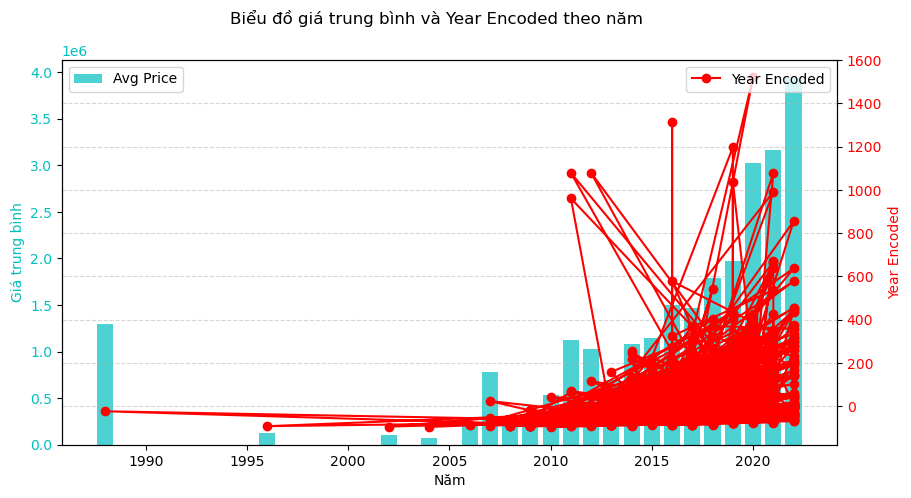

In [21]:
# Tính giá trung bình theo năm
avg_price_per_year = data.groupby('Year')['Price'].mean()

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 5))

# Biểu đồ cột - Giá trung bình theo năm
ax1.bar(avg_price_per_year.index, avg_price_per_year.values, color='c', alpha=0.7, label='Avg Price')
ax1.set_xlabel('Năm')
ax1.set_ylabel('Giá trung bình', color='c')
ax1.tick_params(axis='y', labelcolor='c')

# Trục y thứ hai - Biểu đồ đường Year_Encoded
ax2 = ax1.twinx()
ax2.plot(data['Year'], data['Year_Encoded'], marker='o', linestyle='-', color='r', label='Year Encoded')
ax2.set_ylabel('Year Encoded', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Tiêu đề và hiển thị legend
fig.suptitle('Biểu đồ giá trung bình và Year Encoded theo năm')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Hiển thị biểu đồ
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show() 

In [23]:
data['Make_Price_Encoded'] = data['Make'].map(make_price_mapping)
data['Model_Price_Encoded'] = data['Make'].map(make_price_mapping) # Conditional - Implement if you decide to price-encode 'Model'
data['Fuel_Type_Price_Encoded'] = data['Fuel Type'].map(fuel_type_price_mapping)
data['Transmission_Encoded'] = data['Transmission'].map(transmission_mapping)
data['Location_Tier_Encoded'] = data['Location'].map(location_tier_mapping)
data['Color_Popularity_Encoded'] = data['Color'].map(color_mapping)
data['Seller_Type_Value_Encoded'] = data['Seller Type'].map(seller_type_mapping)
data['Drivetrain_Capability_Encoded'] = data['Drivetrain'].map(drivetrain_mapping)

In [25]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Giả sử Data là DataFrame có sẵn
df = pd.DataFrame({
    'engine1': data['Engine'],
    'engine2': data['Max Power'],
    'engine3': data['Max Torque'],
    'engine3': data['Fuel Tank Capacity']
})

# **1️⃣ Chuẩn hóa dữ liệu**
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# **2️⃣ Áp dụng PCA giảm từ 3 đặc trưng xuống 1**
pca = PCA(n_components=1)
data['Car_Score_PCA'] = pca.fit_transform(data_scaled)


In [27]:
# Giả sử Data là DataFrame có sẵn
df1 = pd.DataFrame({
    'engine1': data['Length'],
    'engine2': data['Width'],
    'engine3': data['Height'],
    'engine4': data['Seating Capacity']
})

# **1️⃣ Chuẩn hóa dữ liệu**
scaler1 = StandardScaler()
data_scaled1 = scaler.fit_transform(df1)

# **2️⃣ Áp dụng PCA giảm từ 3 đặc trưng xuống 1**
pca1 = PCA(n_components=1)
data['Car_PCA'] = pca1.fit_transform(data_scaled1)

In [29]:
data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Make_Price_Encoded,Model_Price_Encoded,Fuel_Type_Price_Encoded,Transmission_Encoded,Location_Tier_Encoded,Color_Popularity_Encoded,Seller_Type_Value_Encoded,Drivetrain_Capability_Encoded,Car_Score_PCA,Car_PCA
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,2,...,2.0,2.0,3,1,3,3,1,0,-0.798425,-0.181223
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,1,...,2.0,2.0,3,1,1,3,1,1,1.190535,0.949929
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,1,...,0.0,0.0,3,0,1,3,1,0,1.036206,2.516116
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,1,...,2.0,2.0,3,1,3,3,1,2,4.318711,4.438324
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,1,...,1.0,1.0,3,1,3,3,1,1,2.417921,2.802588


In [31]:
print(data.columns)
# Lấy các cột có kiểu dữ liệu int hoặc float
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Hiển thị các cột
print(numeric_columns.columns)


Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity', 'Year_Encoded',
       'Make_Price_Encoded', 'Model_Price_Encoded', 'Fuel_Type_Price_Encoded',
       'Transmission_Encoded', 'Location_Tier_Encoded',
       'Color_Popularity_Encoded', 'Seller_Type_Value_Encoded',
       'Drivetrain_Capability_Encoded', 'Car_Score_PCA', 'Car_PCA'],
      dtype='object')
Index(['Price', 'Year', 'Kilometer', 'Owner', 'Engine', 'Length', 'Width',
       'Height', 'Year_Encoded', 'Make_Price_Encoded', 'Model_Price_Encoded',
       'Fuel_Type_Price_Encoded', 'Transmission_Encoded',
       'Location_Tier_Encoded', 'Color_Popularity_Encoded',
       'Seller_Type_Value_Encoded', 'Drivetrain_Capability_Encoded',
       'Car_Score_PCA', 'Car_PCA'],
      dtype='object')


In [33]:
# Chọn tất cả các cột có kiểu dữ liệu int hoặc float
X = data.select_dtypes(include=['int64', 'float64'])

X.drop(columns=['Price', 'Model_Price_Encoded', 'Year', 'Engine', 
                'Max Power', 'Max Torque', 'Fuel Tank Capacity','Length' ,'Width' , 'Height' ,'Seating Capacity' ], 
       inplace=True, errors='ignore')

y= data['Price'].values.reshape(-1, 1)

# Hiển thị kết quả
print(X.shape)
print (y.shape)
print(X.columns)


(1647, 12)
(1647, 1)
Index(['Kilometer', 'Owner', 'Year_Encoded', 'Make_Price_Encoded',
       'Fuel_Type_Price_Encoded', 'Transmission_Encoded',
       'Location_Tier_Encoded', 'Color_Popularity_Encoded',
       'Seller_Type_Value_Encoded', 'Drivetrain_Capability_Encoded',
       'Car_Score_PCA', 'Car_PCA'],
      dtype='object')


In [35]:
X

,Kilometer,Owner,Year_Encoded,Make_Price_Encoded,Fuel_Type_Price_Encoded,Transmission_Encoded,Location_Tier_Encoded,Color_Popularity_Encoded,Seller_Type_Value_Encoded,Drivetrain_Capability_Encoded,Car_Score_PCA,Car_PCA
0,75576,2,-52.848401,2.0,3,1,3,3,1,0,-0.798425,-0.181223
1,77000,1,29.607958,2.0,3,1,1,3,1,1,1.190535,0.949929
2,112000,1,-52.848401,0.0,3,0,1,3,1,0,1.036206,2.516116
3,3000,1,660.319533,2.0,3,1,3,3,1,2,4.318711,4.438324
4,73000,1,106.229306,1.0,3,1,3,3,1,1,2.417921,2.802588
...,...,...,...,...,...,...,...,...,...,...,...,...
1642,92000,2,-62.573418,0.0,3,0,1,3,1,0,-1.086907,-0.452248
1643,9212,1,-54.204010,1.0,2,0,1,3,1,0,-0.798425,-0.181223
1644,16800,1,-78.251325,0.0,2,0,3,3,1,0,-1.809029,-2.554189
1645,68000,1,34.382057,2.0,3,1,2,2,1,1,1.080341,1.392409


In [37]:
import numpy as np
import pandas as pd

class LinearRegression:
  def __init__(self, learning_rate=0.01, n_epochs=1000, batch_size= 32 ):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        self.loss_history= []

  def compute_loss(self, y_true, y_pred):
    """Computes the Mean Squared Error loss."""
    return np.mean((y_true - y_pred)**2)

  def forward(self , X ):
    """Performs the forward pass: y_pred = X * weights + bias."""
    return np.dot(X, self.weights) + self.bias

  def backward(self, X ,y_true, y_pred):
    """Performs backpropagation to compute gradients."""
    dw= -2/len(X)* np.dot(X.T , (y_true - y_pred))
    db= -2/len(X)*np.sum((y_true - y_pred))
    return dw, db

  def fit(self , X_train , y_train):
    """Fits the linear regression model to the training data."""
    if isinstance(X_train, pd.DataFrame) or isinstance(X_train, pd.Series):
            X_train = X_train.to_numpy()
    if isinstance(y_train, pd.DataFrame) or isinstance(y_train, pd.Series):
            y_train = y_train.to_numpy()

    n_samples, n_features = X_train.shape
    self.weights = np.zeros((n_features, 1))
    self.bias = 0

    # Reshape y_train to be (n_samples, 1) if it's not already
    if y_train.ndim == 1:
        y_train = y_train.reshape(-1, 1)

    for epoch in range(self.n_epochs):

      # Shuffle the data
      idx = np.random.permutation(n_samples)
      X_train =  X_train[idx]
      y_train = y_train[idx]

      for i in range(0, n_samples , self.batch_size):
        X_batch = X_train[i:i + self.batch_size]
        y_batch =  y_train[i:i+ self.batch_size]

        y_pred = self.forward(X_batch)
        dw,db = self.backward(X_batch, y_batch , y_pred)

        self.weights -= self.learning_rate*dw
        self.bias -=self.learning_rate*db

      y_train_pred = self.forward(X_train)
      loss= self.compute_loss(y_train ,y_train_pred)
      self.loss_history.append(loss)

      if ((epoch+1 )% 10 == 0):
        print (f"Epoch {epoch+1} , loss : {loss:.4f}"  )

  def evaluate(self, X_test ,y_test):
    """Evaluates the model on the test data and prints the loss."""
    if isinstance(X_test, pd.DataFrame) or isinstance(X_test, pd.Series):
            X_test = X_test.to_numpy()
    if isinstance(y_test, pd.DataFrame) or isinstance(y_test, pd.Series):
            y_test = y_test.to_numpy()
    if y_test.ndim == 1:
        y_test = y_test.reshape(-1, 1)

    y_test_pred = self.forward(X_test)
    test_loss=self.compute_loss(y_test ,y_test_pred)
    print(f"Test Loss: {test_loss:.4f}")
    return test_loss




# Example usage:
# X_train, y_train = (1647, 19), (1647, 1)
# model = LinearRegression()
# model.fit(X_train, y_train)
# model.evaluate(X_test, y_test)


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
X_train.head()


,Kilometer,Owner,Year_Encoded,Make_Price_Encoded,Fuel_Type_Price_Encoded,Transmission_Encoded,Location_Tier_Encoded,Color_Popularity_Encoded,Seller_Type_Value_Encoded,Drivetrain_Capability_Encoded,Car_Score_PCA,Car_PCA
819,72000,1,-42.533989,1.0,3,1,3,3,1,2,2.380830,2.757441
1022,2670,1,3.085124,0.0,2,1,1,3,1,0,-0.384756,0.082049
1049,40031,2,-32.219577,2.0,3,1,2,2,1,0,-0.798425,-0.181223
692,53000,2,-67.642215,0.0,2,1,3,3,1,0,-1.205345,-1.466780
544,48591,1,-60.215838,0.0,2,0,3,3,1,0,-1.121958,-0.966654


In [43]:

def clean_data(X, y):
    # Thay thế NaN bằng giá trị trung bình của từng cột
    X = np.where(np.isnan(X), np.nanmean(X, axis=0), X)
    y = np.where(np.isnan(y), np.nanmean(y, axis=0), y)

    # Thay thế Inf bằng giá trị lớn nhất của cột đó
    X = np.where(np.isinf(X), np.nanmax(X, axis=0), X)
    y = np.where(np.isinf(y), np.nanmax(y, axis=0), y)

    return X, y


# Kiểm tra và làm sạch dữ liệu trước khi đưa vào mô hình
X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)

# Kiểm tra số lượng NaN hoặc Inf còn lại
print("NaN trong X_train:", np.isnan(X_train).sum())
print("Inf trong X_train:", np.isinf(X_train).sum())
print("NaN trong y_train:", np.isnan(y_train).sum())
print("Inf trong y_train:", np.isinf(y_train).sum())
 

NaN trong X_train: 0
Inf trong X_train: 0
NaN trong y_train: 0
Inf trong y_train: 0


In [47]:
import numpy as np
import pandas as pd

class LinearRegression:
  def __init__(self, learning_rate=0.01, n_epochs=1000, batch_size= 32 ):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        self.loss_history= []

  def compute_loss(self, y_true, y_pred):
    """Computes the Mean Squared Error loss."""
    return np.mean((y_true - y_pred)**2)

  def forward(self , X ):
    """Performs the forward pass: y_pred = X * weights + bias."""
    return np.dot(X, self.weights) + self.bias

  def backward(self, X ,y_true, y_pred):
    """Performs backpropagation to compute gradients."""
    dw= -2/len(X)* np.dot(X.T , (y_true - y_pred))
    db= -2/len(X)*np.sum((y_true - y_pred))
    return dw, db

  def fit(self , X_train , y_train):
    """Fits the linear regression model to the training data."""
    if isinstance(X_train, pd.DataFrame) or isinstance(X_train, pd.Series):
            X_train = X_train.to_numpy()
    if isinstance(y_train, pd.DataFrame) or isinstance(y_train, pd.Series):
            y_train = y_train.to_numpy()

    n_samples, n_features = X_train.shape
    self.weights = np.zeros((n_features, 1))
    self.bias = 0

    # Reshape y_train to be (n_samples, 1) if it's not already
    if y_train.ndim == 1:
        y_train = y_train.reshape(-1, 1)

    for epoch in range(self.n_epochs):

      # Shuffle the data
      idx = np.random.permutation(n_samples)
      X_train =  X_train[idx]
      y_train = y_train[idx]

      for i in range(0, n_samples , self.batch_size):
        X_batch = X_train[i:i + self.batch_size]
        y_batch =  y_train[i:i+ self.batch_size]

        y_pred = self.forward(X_batch)
        dw,db = self.backward(X_batch, y_batch , y_pred)

        self.weights -= self.learning_rate*dw
        self.bias -=self.learning_rate*db

      y_train_pred = self.forward(X_train)
      loss= self.compute_loss(y_train ,y_train_pred)
      self.loss_history.append(loss)

      if ((epoch+1 )% 10 == 0):
        print (f"Epoch {epoch+1} , loss : {loss:.4f}"  )

  def evaluate(self, X_test ,y_test):
    """Evaluates the model on the test data and prints the loss."""
    if isinstance(X_test, pd.DataFrame) or isinstance(X_test, pd.Series):
            X_test = X_test.to_numpy()
    if isinstance(y_test, pd.DataFrame) or isinstance(y_test, pd.Series):
            y_test = y_test.to_numpy()
    if y_test.ndim == 1:
        y_test = y_test.reshape(-1, 1)

    y_test_pred = self.forward(X_test)
    test_loss=self.compute_loss(y_test ,y_test_pred)
    print(f"Test Loss: {test_loss:.4f}")
    return test_loss

Epoch 10 , loss : 8748563206507.2559
Epoch 20 , loss : 8748563206507.2559
Epoch 30 , loss : 8748563206507.2559
Epoch 40 , loss : 8748563206507.2559
Epoch 50 , loss : 8748563206507.2559
Epoch 60 , loss : 8748563206507.2559
Epoch 70 , loss : 8748563206507.2559
Epoch 80 , loss : 8748563206507.2559
Epoch 90 , loss : 8748563206507.2559
Epoch 100 , loss : 8748563206507.2559
Test Loss: 7248070705763.7090


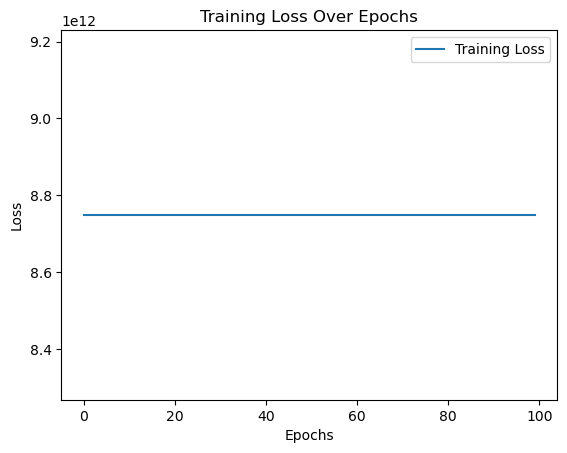

In [49]:

import matplotlib.pyplot as plt
model = LinearRegression(learning_rate=0.0000000000000000000000000000000000000000000000000000000000001, n_epochs=100) # Reduced epochs for quicker example
model.fit(X_train, y_train)
model.evaluate(X_test, y_test)
# Vẽ biểu đồ loss
def plot_loss(loss_history):
    plt.plot(loss_history, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.legend()
    plt.show()

plot_loss(model.loss_history)


Shape of X_train_scaled: (1317, 12)
Shape of y_train: (1317, 1)
Shape of X_test_scaled: (330, 12)
Shape of y_test: (330, 1)
Epoch 10 , loss : 1517099297493.1191
Epoch 20 , loss : 543961205890.6727
Epoch 30 , loss : 244563180946.7905
Epoch 40 , loss : 123991705464.2290
Epoch 50 , loss : 66797907390.6909
Epoch 60 , loss : 38787059957.5548
Epoch 70 , loss : 23466963275.9008
Epoch 80 , loss : 15091407148.9464
Epoch 90 , loss : 10117444241.3418
Epoch 100 , loss : 7050835542.5214
Epoch 110 , loss : 5025515782.3540
Epoch 120 , loss : 3708870181.1576
Epoch 130 , loss : 2780455212.7268
Epoch 140 , loss : 2134747097.2828
Epoch 150 , loss : 1655891015.9797
Epoch 160 , loss : 1293709010.9096
Epoch 170 , loss : 1020228451.2457
Epoch 180 , loss : 807018357.8647
Epoch 190 , loss : 638665822.9426
Epoch 200 , loss : 509631699.2736
Test Loss: 468316206.9095


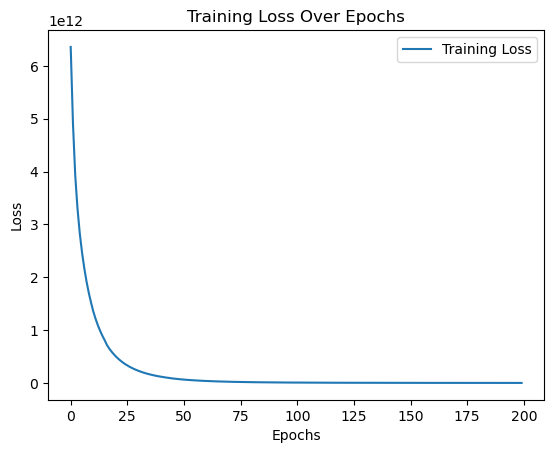

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit scaler on training data and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the *same* scaler fitted on training data
X_test_scaled = scaler.transform(X_test)


print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_test:", y_test.shape)


model = LinearRegression(learning_rate=0.001, n_epochs=200) # Reduced epochs for example
model.fit(X_train_scaled, y_train) # Fit model with scaled training data
model.evaluate(X_test_scaled, y_test) # Evaluate model with scaled test data
plot_loss(model.loss_history)

Shape of X_train_scaled: (1317, 12)
Shape of y_train: (1317, 1)
Shape of X_test_scaled: (330, 12)
Shape of y_test: (330, 1)
Epoch 10, loss: 1530228862788.1086
Epoch 20, loss: 555234133786.9142
Epoch 30, loss: 249219679246.1192
Epoch 40, loss: 124750968822.4549
Epoch 50, loss: 68718784611.4075
Epoch 60, loss: 39938664991.7923
Epoch 70, loss: 24538462246.4978
Epoch 80, loss: 15788837936.9999
Epoch 90, loss: 10515719807.3100
Epoch 100, loss: 7314826206.8931
Epoch 110, loss: 5266827579.9777
Epoch 120, loss: 3875050569.3702
Epoch 130, loss: 2919888109.3467
Epoch 140, loss: 2237099133.4169
Epoch 150, loss: 1720833404.3501
Epoch 160, loss: 1340549106.3373
Epoch 170, loss: 1055457510.0252
Epoch 180, loss: 837879999.0159
Epoch 190, loss: 666240688.1789
Epoch 200, loss: 530968688.3238
Best model found with loss = 530968688.3238
Test Loss: 486912930.0669
Mean Absolute Error (MAE): 15120.9168
R2 Score: 0.9999
Mean Squared Error (MSE): 486912930.0669
Root Mean Squared Error (RMSE): 22066.1036
Mean 

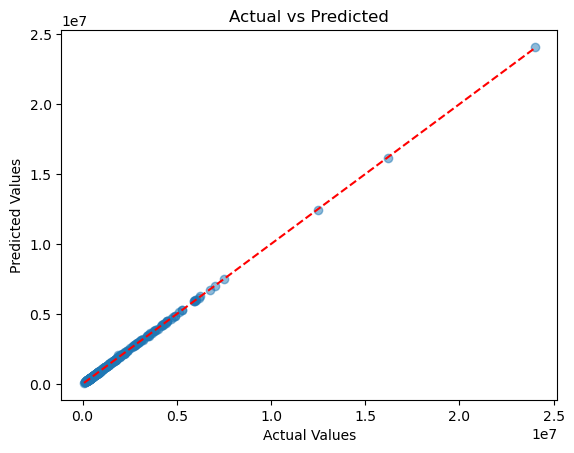

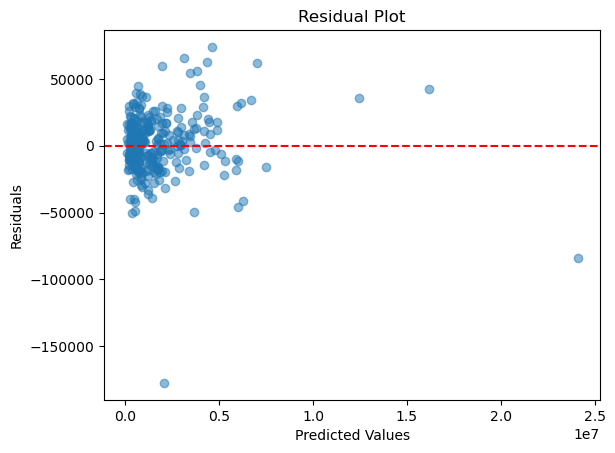

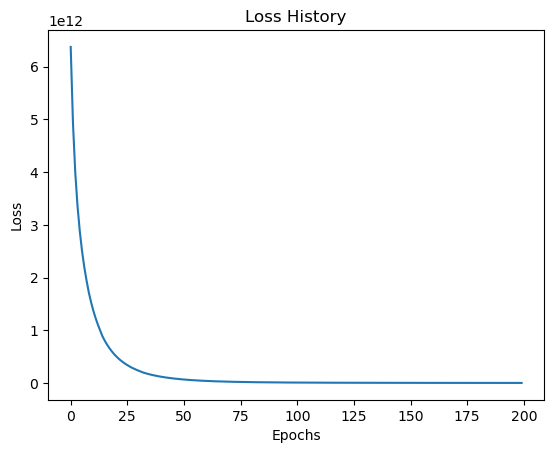

Predictions on Test Data: [ 2341830.29876917  1037340.78038937   217963.14244585   548188.93095472
   286215.21912998  4213732.28880491   620818.83288971  1399800.92517315
   399317.2645633   1464166.01790135   103471.76804396   764726.76610393
   371368.04020633 24083666.91538775  1204737.03617791  1030177.74352759
   886540.22824298   563487.55288613  2701883.30858616   939623.3814579
   651139.54550507  3419063.20911883   235098.68232732   296416.0468358
  1197782.85729634  1765717.40421499  4887992.57465125   385927.14345856
  2976322.10705028  2162675.12701923   301013.69614382  2626353.07260709
   700036.63728902  1187278.63751017  4491120.21068093  5909956.1561256
   275706.33816118  3127149.36180455  4188923.21085084  1744922.75935569
   408591.40368701   554066.89623404  1085121.04481244  2898701.29208329
  1929980.53879711   527676.13797733   433760.42557314 16157535.10134022
   516795.93210031  1230766.12808459  1518986.70618833   732138.62975652
   507751.88404583   109779.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_epochs=1000, batch_size=32):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        self.loss_history = []

    def compute_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def forward(self, X):
        return np.dot(X, self.weights) + self.bias

    def backward(self, X, y_true, y_pred):
        dw = -2 / len(X) * np.dot(X.T, (y_true - y_pred))
        db = -2 / len(X) * np.sum((y_true - y_pred))
        return dw, db

    def fit(self, X_train, y_train):
        if isinstance(X_train, pd.DataFrame) or isinstance(X_train, pd.Series):
            X_train = X_train.to_numpy()
        if isinstance(y_train, pd.DataFrame) or isinstance(y_train, pd.Series):
            y_train = y_train.to_numpy()

        n_samples, n_features = X_train.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        if y_train.ndim == 1:
            y_train = y_train.reshape(-1, 1)

        best_loss = float('inf')
        best_weights = None
        best_bias = None

        for epoch in range(self.n_epochs):
            idx = np.random.permutation(n_samples)
            X_train = X_train[idx]
            y_train = y_train[idx]

            for i in range(0, n_samples, self.batch_size):
                X_batch = X_train[i:i + self.batch_size]
                y_batch = y_train[i:i + self.batch_size]

                y_pred = self.forward(X_batch)
                dw, db = self.backward(X_batch, y_batch, y_pred)

                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

            y_train_pred = self.forward(X_train)
            loss = self.compute_loss(y_train, y_train_pred)
            self.loss_history.append(loss)

            if loss < best_loss:
                best_loss = loss
                best_weights = self.weights.copy()
                best_bias = self.bias

            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch+1}, loss: {loss:.4f}")

        self.weights = best_weights
        self.bias = best_bias
        print(f"Best model found with loss = {best_loss:.4f}")

    def evaluate(self, X_test, y_test):
        if isinstance(X_test, pd.DataFrame) or isinstance(X_test, pd.Series):
            X_test = X_test.to_numpy()
        if isinstance(y_test, pd.DataFrame) or isinstance(y_test, pd.Series):
            y_test = y_test.to_numpy()

        if y_test.ndim == 1:
            y_test = y_test.reshape(-1, 1)

        y_test_pred = self.forward(X_test)
        test_loss = self.compute_loss(y_test, y_test_pred)
        print(f"Test Loss: {test_loss:.4f}")

        mae = mean_absolute_error(y_test, y_test_pred)
        r2 = r2_score(y_test, y_test_pred)
        mse = mean_squared_error(y_test, y_test_pred)
        rmse = np.sqrt(mse)
        mape = self.mean_absolute_percentage_error(y_test, y_test_pred)

        print(f"Mean Absolute Error (MAE): {mae:.4f}")
        print(f"R2 Score: {r2:.4f}")
        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
        print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

        self.plot_actual_vs_predicted(y_test, y_test_pred)
        self.plot_residuals(y_test, y_test_pred)

        return test_loss, y_test_pred

    def mean_absolute_percentage_error(self, y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    def plot_loss_history(self):
        plt.plot(self.loss_history)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Loss History")
        plt.show()

    def plot_actual_vs_predicted(self, y_true, y_pred):
        plt.scatter(y_true, y_pred, alpha=0.5)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title("Actual vs Predicted")
        plt.show()

    def plot_residuals(self, y_true, y_pred):
        residuals = y_true - y_pred
        plt.scatter(y_pred, residuals, alpha=0.5)
        plt.axhline(y=0, color='red', linestyle='--')
        plt.xlabel("Predicted Values")
        plt.ylabel("Residuals")
        plt.title("Residual Plot")
        plt.show()

# Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_test:", y_test.shape)

# Train and Evaluate Model
model = LinearRegression(learning_rate=0.001, n_epochs=200)
model.fit(X_train_scaled, y_train)
test_loss, y_test_pred = model.evaluate(X_test_scaled, y_test)
model.plot_loss_history()

# Print predictions
print("Predictions on Test Data:", y_test_pred.flatten())
